<a href="https://colab.research.google.com/github/Nongbon/INTERNSHIP_NARIT/blob/main/M_phot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math 
import seaborn as sns
from random import seed

In [2]:
!wget https://raw.githubusercontent.com/Nongbon/INTERNSHIP_NARIT/main/data_phot.csv

--2021-07-11 19:59:14--  https://raw.githubusercontent.com/Nongbon/INTERNSHIP_NARIT/main/data_phot.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24157 (24K) [text/plain]
Saving to: ‘data_phot.csv’

data_phot.csv       100%[===================>]  23.59K  --.-KB/s    in 0s      

2021-07-11 19:59:14 (138 MB/s) - ‘data_phot.csv’ saved [24157/24157]



In [3]:
data_phot = pd.read_csv("data_phot.csv").drop(['E(B-V)'],axis=1)
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K,Kepmag
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128,16.624
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062,18.810
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028,14.969
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695,16.319
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375,16.025
...,...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166,14.769
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638,17.990
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163,16.329
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403,18.772


In [4]:
data_phot['d_hi-d'] = data_phot.d_hi - data_phot.d_est
data_phot['d_lo-d'] = data_phot.d_lo - data_phot.d_est
data_phot['sd_d'] = (data_phot['d_hi-d'] + data_phot['d_lo-d']) / 2 
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K,Kepmag,d_hi-d,d_lo-d,sd_d
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128,16.624,2.807822,-2.729777,0.039023
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062,18.810,1.558923,-1.515352,0.021786
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028,14.969,0.058972,-0.058804,0.000084
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695,16.319,1.221147,-1.201754,0.009696
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375,16.025,2.287188,-2.237380,0.024904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166,14.769,0.209875,-0.208742,0.000567
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638,17.990,3.726134,-3.594222,0.065956
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163,16.329,0.228997,-0.227499,0.000749
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403,18.772,0.662431,-0.651813,0.005309


In [5]:
#GENERATE
data_sample_d = []
data_sample_d = pd.DataFrame(data_sample_d)

for i in range(208) :
  data_sample_d[i] = np.random.normal(data_phot.d_est[i] , data_phot.sd_d[i], 10**4)  

In [6]:
data_sample_d.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,192.926716,192.958591,192.997602,192.906421,192.971772,192.953342,192.994405,192.905922,192.928630,192.926931,192.944585,193.003301,193.026238,192.934900,192.954235,192.975585,192.952637,192.926203,192.945518,192.986720,193.022718,192.928200,192.945062,193.024243,192.953772,192.937778,192.917075,192.905773,192.941507,192.914654,192.996824,192.929868,192.973986,192.956220,192.925729,192.949817,192.947516,192.982869,193.022207,192.945905,...,192.915080,192.971692,192.929990,192.919983,193.002327,193.043299,192.981050,192.943148,192.942823,192.929784,192.891409,192.999020,192.920037,192.999226,192.958556,192.944527,192.998890,192.941136,192.977731,192.926104,192.898998,192.908186,192.959000,192.939184,192.923668,192.972540,192.909709,192.915570,192.949429,192.900417,192.928487,193.028721,192.969903,192.952032,192.967842,192.927650,192.997714,192.933163,192.961505,193.020113
1,106.552539,106.525842,106.517373,106.549964,106.502377,106.529792,106.536104,106.542525,106.488101,106.555138,106.496214,106.540003,106.583425,106.570634,106.516535,106.560408,106.539249,106.536427,106.551107,106.549761,106.543170,106.520224,106.522419,106.539273,106.524128,106.475818,106.522134,106.537470,106.526187,106.542099,106.543096,106.523456,106.535004,106.514590,106.539437,106.487626,106.537853,106.547653,106.505538,106.537303,...,106.522939,106.531117,106.540535,106.524083,106.530457,106.536509,106.527547,106.512262,106.544344,106.539144,106.523392,106.522146,106.528689,106.534439,106.542264,106.516700,106.516662,106.525375,106.504244,106.528997,106.523773,106.514839,106.533477,106.525953,106.542635,106.509862,106.509782,106.508640,106.544104,106.518953,106.538651,106.497393,106.490600,106.531273,106.512318,106.490216,106.506677,106.482134,106.566203,106.512143
2,40.706371,40.706342,40.706373,40.706081,40.706478,40.706232,40.706414,40.706167,40.706325,40.706508,40.706421,40.706415,40.706300,40.706400,40.706246,40.706294,40.706371,40.706373,40.706363,40.706498,40.706271,40.706439,40.706248,40.706386,40.706370,40.706529,40.706296,40.706320,40.706490,40.706437,40.706410,40.706297,40.706580,40.706384,40.706535,40.706288,40.706434,40.706458,40.706358,40.706354,...,40.706280,40.706248,40.706386,40.706359,40.706464,40.706405,40.706305,40.706443,40.706370,40.706436,40.706215,40.706445,40.706195,40.706455,40.706457,40.706327,40.706430,40.706546,40.706485,40.706488,40.706146,40.706283,40.706459,40.706539,40.706268,40.706386,40.706342,40.706423,40.706377,40.706475,40.706436,40.706319,40.706392,40.706533,40.706408,40.706382,40.706204,40.706290,40.706386,40.706240
3,148.668031,148.662887,148.669050,148.679835,148.654770,148.665504,148.684864,148.673157,148.676583,148.666111,148.671172,148.667062,148.671104,148.673841,148.674935,148.694134,148.673430,148.656889,148.655006,148.658206,148.681629,148.650565,148.676752,148.677594,148.677597,148.672433,148.655486,148.663100,148.676198,148.683029,148.664779,148.690761,148.660209,148.665925,148.671617,148.666121,148.668871,148.662336,148.687038,148.662682,...,148.681350,148.688827,148.674023,148.692891,148.667227,148.665112,148.671261,148.675038,148.650153,148.672756,148.664882,148.681260,148.658864,148.672985,148.672689,148.661345,148.666223,148.671054,148.682714,148.666497,148.687171,148.671465,148.659229,148.675274,148.673120,148.661130,148.669931,148.675842,148.677135,148.676390,148.659668,148.676256,148.666612,148.659407,148.663248,148.684234,148.678071,148.658560,148.681975,148.676149
4,201.817275,201.870618,201.865863,201.868140,201.852148,201.850827,201.821710,201.845026,201.854745,201.856357,201.825110,201.802843,201.832061,201.833519,201.865237,201.839506,201.841506,201.910127,201.858112,201.865608

In [8]:
#build RMS(Mag)
#Note : ให้รัน # ก่อน 1 รอบ ละใส่ # ไว้เหมือนเดิมแล้วทำการ รันอีก 1 รอบ
#Note2 : รันรอบแรกเพื่อบันทุกข้อมูลก่อน รันรอบที่ 2 คือบันทุกเงื่อนไขลงใน DF
for i in range(208) : 
  if round(data_phot['Kepmag'][i]) < 12 :
    rms = 0.018
  elif round(data_phot['Kepmag'][i]) == 12 :
    rms = 0.017
  elif round(data_phot['Kepmag'][i]) == 13 :
    rms = 0.016
  elif round(data_phot['Kepmag'][i]) == 14 :
    rms = 0.015
  elif round(data_phot['Kepmag'][i]) == 15 :
    rms = 0.018
  elif round(data_phot['Kepmag'][i]) == 16 :
    rms = 0.025
  elif round(data_phot['Kepmag'][i]) == 17 :
    rms = 0.04
  else :
    rms = 0.06
  #data_phot['rms'] = rms
  data_phot['rms'][i] = rms
  print(i,rms)

0 0.04
1 0.06
2 0.018
3 0.025
4 0.025
5 0.025
6 0.018
7 0.018
8 0.04
9 0.017
10 0.04
11 0.06
12 0.04
13 0.06
14 0.06
15 0.025
16 0.018
17 0.015
18 0.015
19 0.015
20 0.04
21 0.025
22 0.015
23 0.018
24 0.025
25 0.018
26 0.018
27 0.025
28 0.025
29 0.04
30 0.06
31 0.04
32 0.025
33 0.04
34 0.04
35 0.06
36 0.015
37 0.04
38 0.04
39 0.025
40 0.025
41 0.025
42 0.025
43 0.018
44 0.025
45 0.04
46 0.015
47 0.025
48 0.06
49 0.025
50 0.025
51 0.04
52 0.06
53 0.04
54 0.025
55 0.025
56 0.018
57 0.025
58 0.018
59 0.025
60 0.04
61 0.018
62 0.06
63 0.025
64 0.06
65 0.06
66 0.025
67 0.018
68 0.06
69 0.04
70 0.04
71 0.04
72 0.025
73 0.06
74 0.018
75 0.06
76 0.025
77 0.06
78 0.04
79 0.018
80 0.04
81 0.025
82 0.06
83 0.025
84 0.015
85 0.04
86 0.025
87 0.025
88 0.06
89 0.04
90 0.06
91 0.025
92 0.06
93 0.025
94 0.025
95 0.06
96 0.025
97 0.015
98 0.04
99 0.04
100 0.015
101 0.015
102 0.025
103 0.018
104 0.018
105 0.025
106 0.04
107 0.025
108 0.025
109 0.018
110 0.018
111 0.06
112 0.04
113 0.04
114 0.04
115 0.025

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [9]:
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K,Kepmag,d_hi-d,d_lo-d,sd_d,rms
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128,16.624,2.807822,-2.729777,0.039023,0.040
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062,18.810,1.558923,-1.515352,0.021786,0.060
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028,14.969,0.058972,-0.058804,0.000084,0.018
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695,16.319,1.221147,-1.201754,0.009696,0.025
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375,16.025,2.287188,-2.237380,0.024904,0.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166,14.769,0.209875,-0.208742,0.000567,0.018
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638,17.990,3.726134,-3.594222,0.065956,0.060
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163,16.329,0.228997,-0.227499,0.000749,0.025
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403,18.772,0.662431,-0.651813,0.005309,0.060


In [10]:
#build sd_r
data_phot['sd_r'] = data_phot['r'] * data_phot['rms']

In [11]:
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K,Kepmag,d_hi-d,d_lo-d,sd_d,rms,sd_r
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128,16.624,2.807822,-2.729777,0.039023,0.040,0.679280
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062,18.810,1.558923,-1.515352,0.021786,0.060,1.126740
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028,14.969,0.058972,-0.058804,0.000084,0.018,0.269064
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695,16.319,1.221147,-1.201754,0.009696,0.025,0.418450
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375,16.025,2.287188,-2.237380,0.024904,0.025,0.411750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166,14.769,0.209875,-0.208742,0.000567,0.018,0.273888
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638,17.990,3.726134,-3.594222,0.065956,0.060,1.079340
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163,16.329,0.228997,-0.227499,0.000749,0.025,0.408025
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403,18.772,0.662431,-0.651813,0.005309,0.060,1.127280


In [12]:
#GENERATE r
data_sample_r = []
data_sample_r = pd.DataFrame(data_sample_r)

for i in range(208) :
  data_sample_r[i] = np.random.normal(data_phot.r[i] , data_phot.sd_r[i], 10**4) 
  

In [13]:
data_sample_r.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,16.910013,16.642033,17.103299,18.053125,17.295654,17.297529,17.069136,17.984916,17.482004,16.924865,18.065890,16.670919,16.872852,17.302454,17.911012,16.996144,17.703333,17.961125,17.136449,16.532545,17.899415,15.488160,16.406849,16.237783,16.266382,16.659072,17.022129,16.539435,18.576374,15.876274,16.765493,16.958545,17.319744,16.852193,17.128101,17.557463,17.342680,16.398193,18.246754,17.052829,...,16.834097,18.007487,16.939781,17.638689,16.969235,15.932714,16.900902,16.062388,16.322824,17.134052,17.892178,16.996933,16.928682,18.039578,16.959272,16.977370,16.630533,17.127825,16.725494,16.875092,16.697005,17.546563,16.547266,16.934200,18.183754,17.626594,16.215703,16.261702,17.824533,17.249507,15.940310,18.619282,18.017652,16.635624,16.139594,17.607893,16.561589,18.107458,17.069114,16.850562
1,17.738418,19.407013,20.073248,19.036291,17.717239,19.222757,16.665444,16.793417,18.969370,18.367077,17.495794,17.993949,17.918953,17.699378,17.774078,17.148072,18.967786,17.153897,21.936779,18.072199,18.659252,18.747052,19.423707,19.591309,20.435127,21.548321,16.795803,18.407418,17.654830,18.960987,20.049759,16.864908,16.587899,16.615118,17.523637,18.164869,18.056318,20.919166,17.245195,20.453731,...,18.073382,18.316498,16.542005,19.402317,18.164432,19.445500,19.181732,19.247091,16.029057,20.298570,17.479743,20.158644,17.660111,17.661676,17.927893,19.766761,17.849673,18.690641,20.654212,19.096284,17.935569,19.742193,19.472666,18.751268,19.617194,18.114245,17.545052,18.891280,19.024368,19.694806,18.620747,15.871210,21.003934,18.961601,17.548513,17.819825,20.143695,19.179615,18.402416,18.899932
2,15.028515,15.043512,15.135121,15.065662,14.717579,15.163652,15.116422,15.188394,14.542215,14.971859,14.855910,14.457865,14.785118,15.150084,14.901593,15.161878,14.758768,15.082026,15.305003,15.071227,14.406595,14.842103,14.522478,15.035739,14.809500,14.532168,14.413946,14.737088,15.110213,14.204941,14.563856,14.480433,15.015015,15.437904,14.870476,14.726991,14.757308,14.859000,14.903028,15.091302,...,15.069879,14.705896,14.665406,15.071341,15.281399,15.229887,14.885715,14.476482,15.604402,14.796094,15.351489,14.504510,14.859885,14.982202,15.153778,14.960619,15.065377,15.280139,14.962395,15.019550,14.825218,15.407885,15.469510,15.084020,15.073499,15.306434,15.120585,14.724814,15.146675,14.977859,15.195922,15.286809,15.038631,14.833308,14.768050,15.165821,15.285858,15.289417,14.996933,15.235686
3,17.171949,16.719575,16.564721,17.629997,16.943545,17.207131,16.869913,16.575377,16.487759,16.893133,16.217349,16.255706,16.492121,16.161498,16.699978,16.374104,16.296882,16.676315,16.439260,17.202965,16.961539,16.916837,16.228411,16.409622,17.243324,16.714291,16.694371,16.703570,17.012109,16.988533,16.964438,16.619657,17.059529,17.073063,16.992051,16.943420,16.673839,17.339238,16.850171,16.479209,...,16.697207,17.514046,16.731289,16.724052,16.736455,16.332159,16.458128,17.026642,17.464265,16.292141,16.300487,16.324611,16.884795,16.966864,16.707771,16.930096,16.952763,17.309378,16.630662,17.740418,16.727917,17.235548,16.455522,17.050012,16.130507,17.244194,16.864435,16.981375,16.873115,16.854543,16.549418,17.337556,17.345266,16.657493,16.644631,17.133678,17.105917,16.660746,16.342681,17.585720
4,16.235201,16.833232,16.783809,15.783849,16.857154,16.481575,16.803948,16.231555,16.400129,16.793158,15.811193,16.724053,16.909471,15.978737,16.169475,15.804581,16.435102,16.728594,16.621255,16.706210,16.822836,15.820199,16.390731,16.096843,17.123560,17.128936,16.370233,16.538269,16.699116,16.791287,16.125482,16.397114,16.735701,15.959963,16.524650,16.722278,15.949985,16.935758,17.114530,16.619261,...,16.232146,16.303736,16.404708,16.841409,16.533260,15.95

In [14]:
# find M_r
# M = m - 5[log(d)-1] - A
M_r = []
M_r = pd.DataFrame(M_r)
for i in range(208) :
  M_r[i] = data_sample_r[i] - (5 * (np.log10(data_sample_d[i])-1)) - data_phot.A_r[i]

In [15]:
M_r = M_r.T
M_r['Median'] = np.median(M_r,axis=1)

In [16]:
#Find percentage 14 & 86
M_r['Percen14'] = np.percentile(M_r,14,axis=1)
M_r['Percen86'] = np.percentile(M_r,86,axis=1)

In [17]:
#Find Error
M_r['M-'] = M_r['Percen14'] - M_r['Median']
M_r['M+'] = M_r['Percen86'] - M_r['Median']

In [18]:
M_r

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999,Median,Percen14,Percen86,M-,M+
0,10.429506,10.161167,10.621994,11.572846,10.814640,10.816722,10.587867,11.504643,11.001475,10.444355,11.585182,10.189550,10.391225,10.821854,11.430195,10.515087,11.222534,11.480624,10.655730,10.051362,11.417828,9.007636,9.926136,9.756179,9.785571,10.178440,10.541730,10.059164,12.095701,9.395903,10.284197,10.478002,10.838705,10.371354,10.647605,11.076696,10.861939,9.917054,11.765173,10.572106,...,9.450895,10.419783,9.581696,9.842136,10.653510,11.412069,10.515612,10.448250,11.558255,10.478406,10.496663,10.149214,10.647156,10.244413,10.394592,10.216810,11.066264,10.066396,10.453552,11.703282,11.145571,9.735388,9.781320,11.343770,10.769296,9.459783,12.137627,11.536659,10.154832,9.658624,11.127375,10.080283,11.626878,10.588215,10.369004,10.503993,9.767366,11.259863,-0.736628,0.755870
1,12.581393,14.250531,14.916940,13.879319,12.561236,14.066196,11.508753,11.636596,13.813658,13.209999,12.339917,12.837179,12.761298,12.541984,12.617787,11.990886,13.811031,11.997200,16.779783,12.915230,13.502417,13.590686,14.267295,14.434554,15.278680,16.392860,11.639398,13.250700,12.498342,13.804174,14.892926,11.708475,11.431231,11.458867,12.366878,13.009167,12.899592,15.762240,12.089128,15.297016,...,14.288801,14.025216,14.090887,10.872198,15.141818,12.323312,15.002239,12.503572,12.505020,12.771077,14.610467,12.693379,13.534169,15.498171,13.939739,12.779130,14.585936,14.316029,13.594785,14.460371,12.958089,12.388899,13.735150,13.867515,14.538465,13.464005,10.715309,15.848171,13.805009,12.392307,12.664070,14.987604,14.024025,13.245112,13.743730,13.639737,12.413950,14.865151,-1.225786,1.225414
2,11.970984,11.985982,12.077590,12.008147,11.660042,12.106128,12.058889,12.130874,11.484687,11.914321,11.798376,11.400331,11.727591,12.092552,11.844069,12.104352,11.701237,12.024495,12.247472,12.013689,11.349069,11.784569,11.464953,11.978207,11.751969,11.474628,11.356419,11.679560,12.052676,11.147407,11.506323,11.422906,11.957473,12.380372,11.812936,11.669465,11.699774,11.801465,11.845498,12.033772,...,12.172354,11.828188,11.418947,12.546871,11.738560,12.293967,11.446975,11.802364,11.924666,12.096242,11.903091,12.007843,12.222599,11.904858,11.962013,11.767699,12.350358,12.411975,12.026480,12.015973,12.248902,12.063056,11.667280,12.089144,11.920322,12.138388,12.229281,11.981099,11.775769,11.710518,12.108290,12.228336,12.231891,11.939401,12.178162,11.894604,11.598113,12.184664,-0.296492,0.290060
3,11.268223,10.815924,10.660980,11.726099,11.040012,11.303442,10.965941,10.671576,10.583908,10.989435,10.313577,10.351994,10.588350,10.257687,10.796151,10.469997,10.393077,10.772752,10.535724,11.299383,11.057614,11.013366,10.324557,10.505757,11.339459,10.810501,10.790828,10.799916,11.108264,11.084588,11.060759,10.715599,11.155917,11.169368,11.088273,11.039722,10.770101,11.435595,10.946167,10.575561,...,10.428475,10.554355,11.122813,11.560800,10.388346,10.396807,10.420691,10.981203,11.063065,10.803977,11.026467,11.049064,11.405608,10.726722,11.836714,10.823912,11.331772,10.551925,11.146180,10.226707,11.340569,10.960682,11.077535,10.969256,10.950695,10.645814,11.433710,11.441560,10.753893,10.740975,11.229716,11.202044,10.757158,10.438752,11.681875,10.837425,10.387600,11.285829,-0.449825,0.448404
4,9.644092,10.241549,10.192177,9.192193,10.265669,9.890105,10.212791,9.640147,9.808616,10.201628,9.219999,10.133099,10.318202,9.387453,9.577850,9.213233,9.843731,10.136485,10.029706,10.114580,10.231720,9.228726,9.799601,9.505570,10.531917,10.537895,9.778715,9.946819,10.107176,10.200020,9.533794,9.805702,10.144355,9.368613,9.932604,10.130993,9.358865,10.344217,10.522923,10.027816,...,9.368135,9.181779,10.419827,9.935170,9.966322,10.359663,9.355471,10.102969,9.659754,10.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


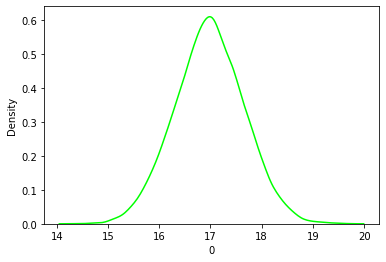

In [ ]:
sns.distplot(data_sample_r[0] , color = 'lime' , hist=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


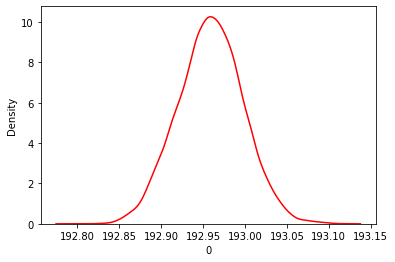

In [ ]:
sns.distplot(data_sample_d[0] , color = 'red' , hist=False)

In [ ]:
M_r.to_csv("M_r_phot.csv") 